CML -- Coupled Map Lattice 
jisa paper have mentioned 1D CML, Although there 2D CML as well
See JISA paper for the equation No. 14-15

Inital parameters

In [8]:
import pandas as pd
import math
Total_Image_Size = 44100
print(Total_Image_Size)
img_side = int(math.sqrt(Total_Image_Size))
print(img_side)
print(type(Total_Image_Size))


44100
210
<class 'int'>


chaotic matrix used for cml initial state

In [18]:
def chaotic_function(x_n,r=3.9):
    ''' The function is a simulation of chatoic behaviour 
        based on equation  x_n+1 = r * x_n * (1 - x_n)
        where each new_value(x_n+1) is based on old_value(x_n) with a seed vaue r 
    '''
    '''Arguments 
        x_n (previous value and seed value)
        r=custom chatoic constant
    '''
    return r*x_n*(1-x_n)

my_values=[] ; iterations=[]
r=3.9
x_n =0.5
for i in range(img_side*3+10000):#100 iterations
    if(i<10000):#transient iterations
        continue
    my_values.append(x_n)
    x_n_1 = chaotic_function(x_n,r)
    x_n=x_n_1
    iterations.append(i)
chaotic_df=pd.DataFrame({"iteration":iterations,"value":my_values})

import plotly.express as px
fig = px.scatter(
    chaotic_df,
    x="iteration",
    y="value",
    color="value",
    title="Chaotic 1D Logistic Map",
    size_max=2
)
fig.show()
print(chaotic_df)

     iteration     value
0        10000  0.500000
1        10001  0.975000
2        10002  0.095063
3        10003  0.335500
4        10004  0.869465
..         ...       ...
625      10625  0.578186
626      10626  0.951159
627      10627  0.181176
628      10628  0.578569
629      10629  0.950925

[630 rows x 2 columns]


In [ ]:
x=chaotic_df['value'][0:img_side]
y=chaotic_df['value'][img_side:2*img_side]
z=chaotic_df['value'][2*img_side:3*img_side]

print(x)
print(y)
print(z)

0      0.500000
1      0.975000
2      0.095063
3      0.335500
4      0.869465
         ...   
205    0.170856
206    0.552490
207    0.964255
208    0.134424
209    0.453781
Name: value, Length: 210, dtype: float64
210    0.966669
211    0.125658
212    0.428487
213    0.955055
214    0.167408
         ...   
415    0.232920
416    0.696807
417    0.823941
418    0.565743
419    0.958144
Name: value, Length: 210, dtype: float64
420    0.156407
421    0.514582
422    0.974171
423    0.098132
424    0.345159
         ...   
625    0.578186
626    0.951159
627    0.181176
628    0.578569
629    0.950925
Name: value, Length: 210, dtype: float64


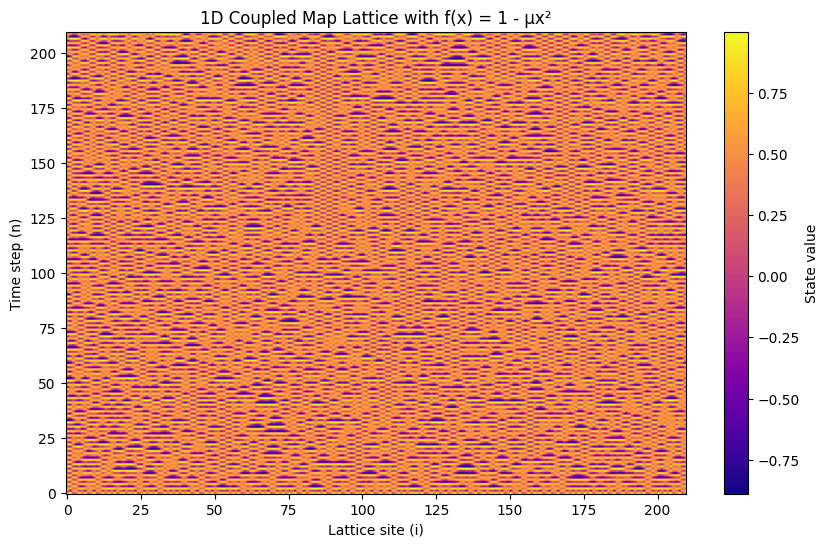

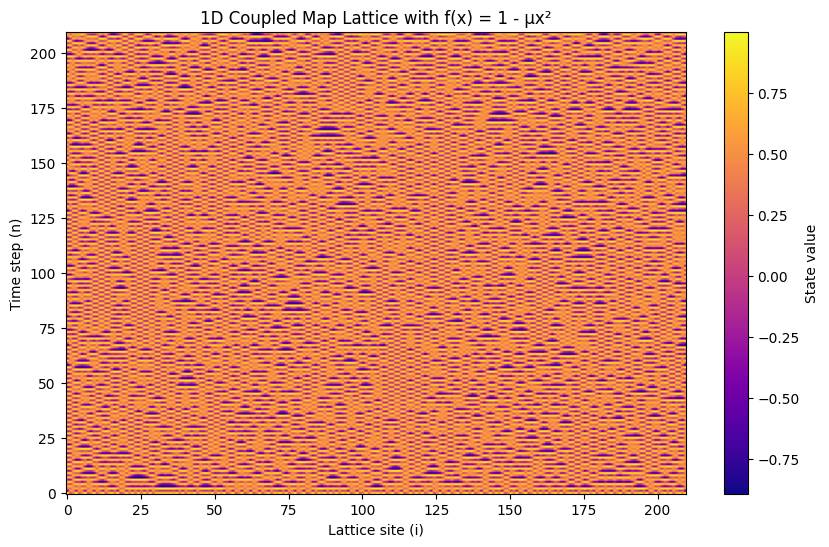

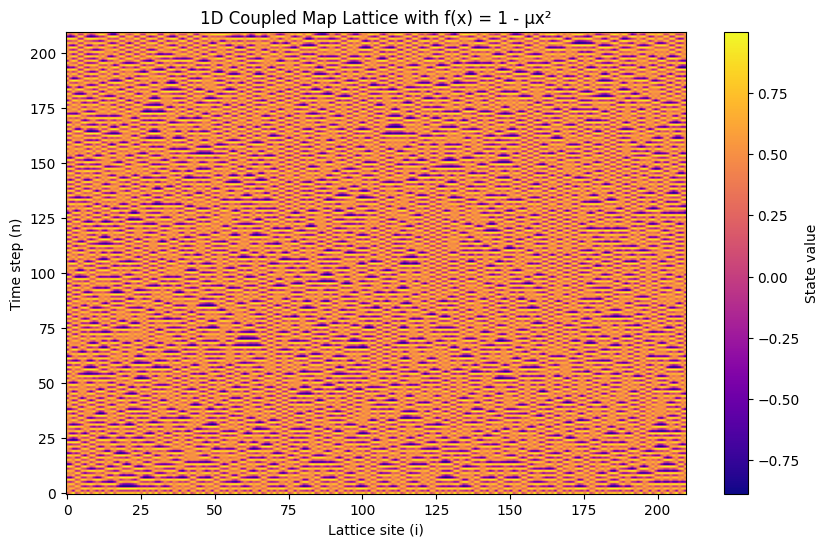

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

#lattice initialisation it will be made using (secrent key, which results in same chaotic lattic in decryption)
# x = np.random.uniform(-1, 1, N)   # initial random values between (-1,1) 
x=chaotic_df['value'][0:img_side]
y=chaotic_df['value'][img_side:2*img_side]
z=chaotic_df['value'][2*img_side:3*img_side]


# ---------------------------
# Parameters
# ---------------------------
N = img_side          # number of lattice sites
T = img_side          # number of time steps
mu = 1.9         # parameter for quadratic map
eps = 0.3        # coupling strength

cml_1st = np.zeros((T, N))        # store evolution
cml_2nd = np.zeros((T, N))        # store evolution
cml_3rd = np.zeros((T, N))        # store evolution
# Quadratic map function (Eq. 15)
def f(x):
    return 1 - (mu * math.pow(x, 2))

# Vectorized version for performance
f_vec = np.vectorize(f)
# ---------------------------
# Evolution of the CML
# ---------------------------
for t in range(T):
    cml_1st[t] = x
    fx = f_vec(x)  # local map update
    # periodic boundary conditions
    x_left = np.roll(fx, 1)
    x_right = np.roll(fx, -1)
    # CML update rule
    x = (1 - eps) * fx + (eps / 2) * (x_left + x_right)


    #NOTE: the cml should be made with unique values and independent, currently for finilisaing early i am making 3 cml of shape 210*210 together
    cml_2nd[t] = y
    fy = f_vec(y)  # local map update
    # periodic boundary conditions
    y_left = np.roll(fy, 1)
    y_right = np.roll(fy, -1)
    # CML update rule
    y = (1 - eps) * fy + (eps / 2) * (y_left + y_right)

    cml_3rd[t] = z
    fz = f_vec(z)  # local map update
    # periodic boundary conditions
    z_left = np.roll(fz, 1)
    z_right = np.roll(fz, -1)
    # CML update rule
    z = (1 - eps) * fz + (eps / 2) * (z_left + z_right)

# ---------------------------
# Visualization
# ---------------------------
plt.figure(figsize=(10, 6))
plt.imshow(cml_1st, cmap="plasma", aspect="auto", origin="lower")
plt.colorbar(label="State value")
plt.xlabel("Lattice site (i)")
plt.ylabel("Time step (n)")
plt.title("1D Coupled Map Lattice with f(x) = 1 - μx²")
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(cml_2nd, cmap="plasma", aspect="auto", origin="lower")
plt.colorbar(label="State value")
plt.xlabel("Lattice site (i)")
plt.ylabel("Time step (n)")
plt.title("1D Coupled Map Lattice with f(x) = 1 - μx²")
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(cml_3rd, cmap="plasma", aspect="auto", origin="lower")
plt.colorbar(label="State value")
plt.xlabel("Lattice site (i)")
plt.ylabel("Time step (n)")
plt.title("1D Coupled Map Lattice with f(x) = 1 - μx²")
plt.show()



In [28]:
print(cml_1st.shape)
print(cml_2nd.shape)
print(cml_3rd.shape)
print(cml_1st)
print(cml_2nd)
print(cml_3rd)

(210, 210)
(210, 210)
(210, 210)
[[ 0.5         0.975       0.0950625  ...  0.96425458  0.13442397
   0.45378125]
 [ 0.33788541 -0.33815676  0.68497317 ... -0.32876145  0.65229143
   0.64972993]
 [ 0.69525628  0.68165839  0.22945742 ...  0.70567072  0.28298971
   0.28474141]
 ...
 [ 0.34986961 -0.49699133 -0.81230627 ...  0.66500977  0.92980774
   0.90500165]
 [ 0.53337829  0.44854818 -0.09933659 ...  0.12881234 -0.50930224
  -0.3705883 ]
 [ 0.52514373  0.64851739  0.92667419 ...  0.83621971  0.61114337
   0.6623374 ]]
[[ 0.96666893  0.12565844  0.42848676 ...  0.82394085  0.56574307
   0.95814361]
 [-0.50895825  0.66035507  0.49135366 ... -0.13250604  0.11919171
  -0.5785286 ]
 [ 0.43581101  0.27739539  0.53331035 ...  0.96658312  0.88071298
   0.47698032]
 ...
 [ 0.27386688  0.72294292  0.33607887 ... -0.13442821 -0.02831315
   0.18953916]
 [ 0.74105302  0.25131386  0.623593   ...  0.97497832  0.98354496
   0.93061528]
 [ 0.00479477  0.64866107  0.37115595 ... -0.75946889 -0.80432855

In [32]:
cml_1st_values=[]; cml_2nd_values=[];cml_3rd_values=[]; iterations=[]
for i in range(cml_1st.shape[0]):
    for j in range(cml_1st.shape[1]):
        iterations.append((i*img_side+j))
        cml_1st_values.append(cml_1st[i][j])
        cml_2nd_values.append(cml_2nd[i][j])
        cml_3rd_values.append(cml_3rd[i][j])
print(len(cml_1st_values))
print(len(cml_2nd_values))
print(len(cml_3rd_values))

cml_1st_values_df=pd.DataFrame()
cml_2nd_values_df=pd.DataFrame()
cml_3rd_values_df=pd.DataFrame()
cml_1st_values_df["iterations"]=iterations
cml_2nd_values_df["iterations"]=iterations
cml_3rd_values_df["iterations"]=iterations
cml_1st_values_df['values']=cml_1st_values
cml_2nd_values_df['values']=cml_2nd_values
cml_3rd_values_df['values']=cml_3rd_values
print(cml_1st_values_df)
print(cml_2nd_values_df)
print(cml_3rd_values_df)

44100
44100
44100
       iterations    values
0               0  0.500000
1               1  0.975000
2               2  0.095063
3               3  0.335500
4               4  0.869465
...           ...       ...
44095       44095  0.646588
44096       44096  0.650812
44097       44097  0.836220
44098       44098  0.611143
44099       44099  0.662337

[44100 rows x 2 columns]
       iterations    values
0               0  0.966669
1               1  0.125658
2               2  0.428487
3               3  0.955055
4               4  0.167408
...           ...       ...
44095       44095  0.287258
44096       44096 -0.357616
44097       44097 -0.759469
44098       44098 -0.804329
44099       44099 -0.584048

[44100 rows x 2 columns]
       iterations    values
0               0  0.156407
1               1  0.514582
2               2  0.974171
3               3  0.098132
4               4  0.345159
...           ...       ...
44095       44095 -0.080757
44096       44096  0.796505
44097 

In [33]:
fig = px.scatter(
    cml_1st_values_df,
    x=cml_1st_values_df["iterations"],
    y=cml_1st_values_df['values'],
    color=cml_1st_values_df['values']
)
fig.show()
fig = px.scatter(
    cml_2nd_values_df,
    x=cml_2nd_values_df["iterations"],
    y=cml_2nd_values_df['values'],
    color=cml_2nd_values_df['values']
)
fig.show()
fig = px.scatter(
    cml_3rd_values_df,
    x=cml_3rd_values_df["iterations"],
    y=cml_3rd_values_df['values'],
    color=cml_3rd_values_df['values']
)
fig.show()